Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Importing Dataset

In [2]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
#rename columns for better use
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [5]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Removing Duplicate values

In [6]:
df.duplicated().any()

True

In [7]:
df.shape

(1436, 11)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1435, 11)

In [10]:
from matplotlib import pyplot as plt

Checking and treating outliers

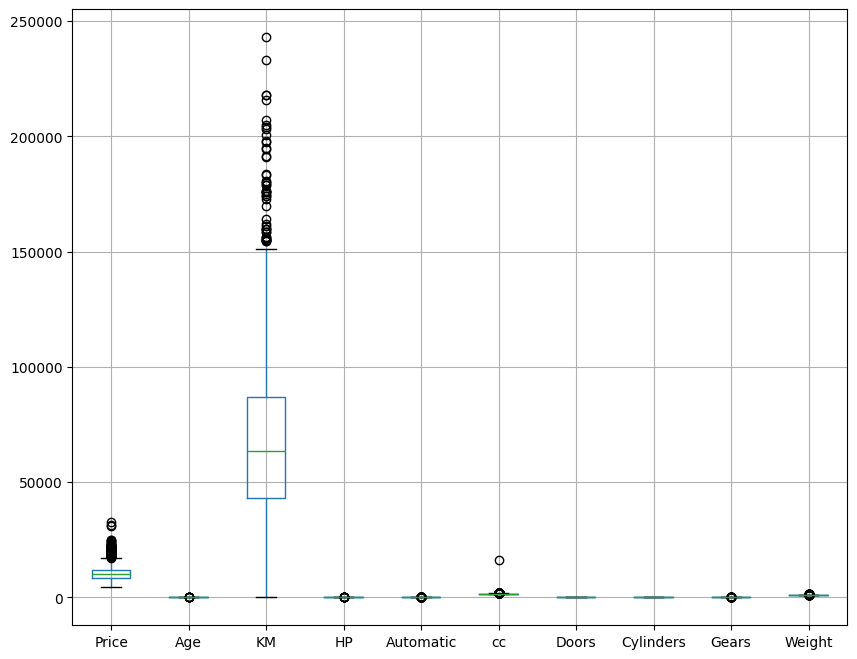

In [11]:
df.boxplot(figsize=(10,8))
plt.show()

Removing outliers using Iqr method

In [12]:
numerical_cols = df.select_dtypes(include=[np.number])
Q1 = numerical_cols.quantile(0.25)

Q3 = numerical_cols.quantile(0.75)

IQR = Q3 - Q1


# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


# Outliers
outliers = {}
for col in numerical_cols.columns:
    numerical_col_outliers = numerical_cols[(numerical_cols[col] < lower_bound[col]) | (numerical_cols[col] > upper_bound[col])]
    if not numerical_col_outliers.empty:
        outliers[col] = numerical_col_outliers[col]


numerical_cols_no_outliers = numerical_cols[(numerical_cols >= lower_bound) & (numerical_cols <= upper_bound)].dropna().reset_index(drop=True)
new_df = numerical_cols_no_outliers
new_df = pd.merge(new_df, df[['Price', 'Fuel_Type']], on='Price', how='left')

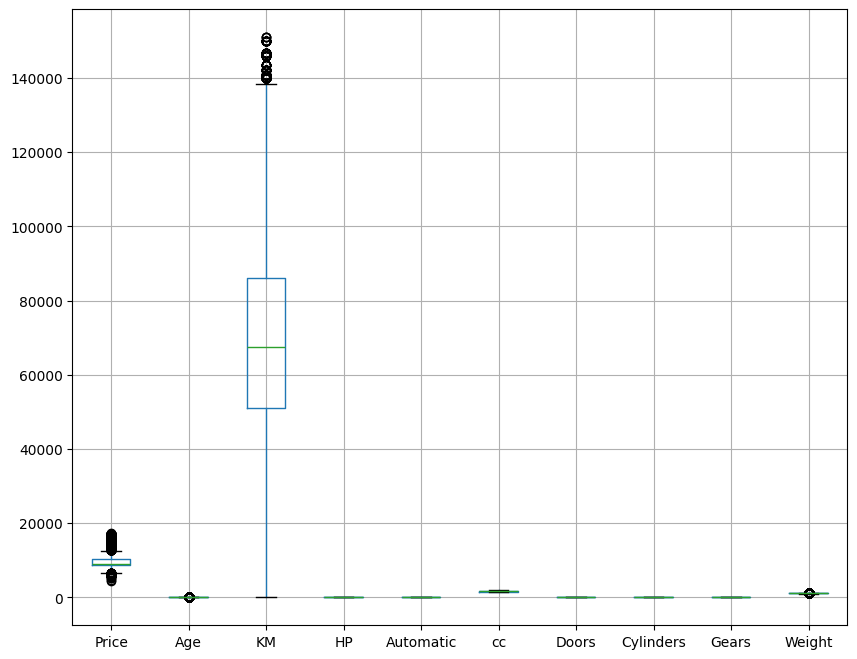

In [13]:
new_df.boxplot(figsize=(10,8))
plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising data

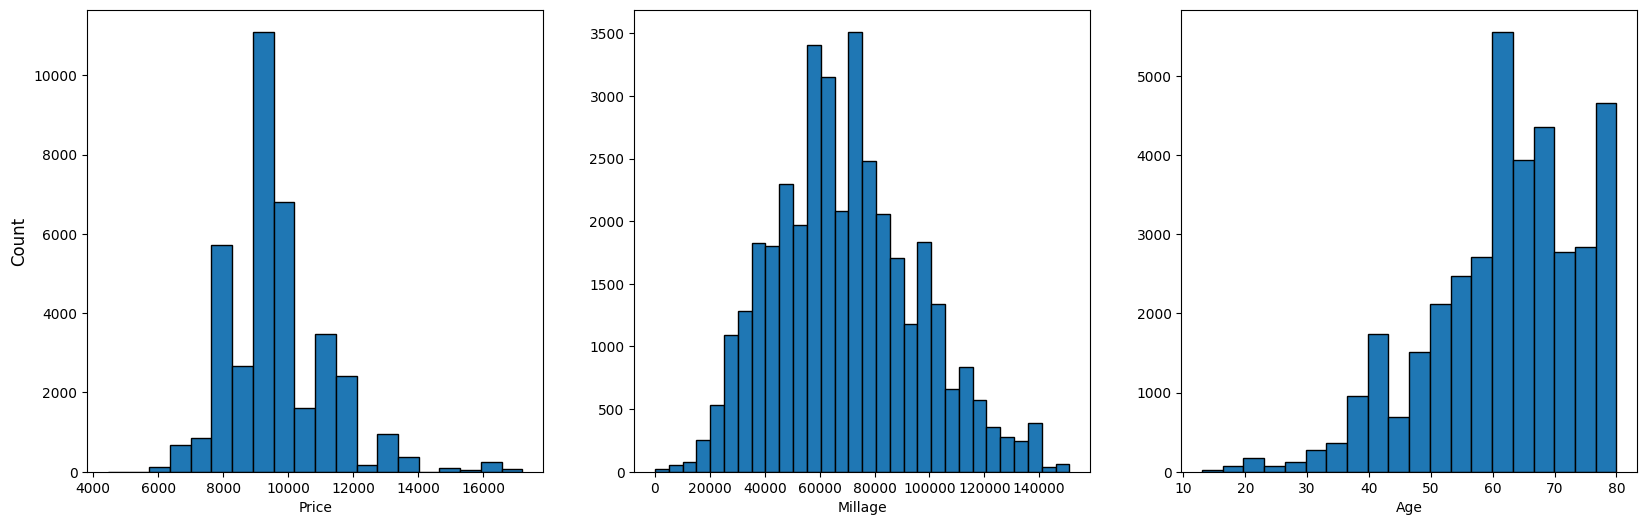

In [15]:
fig,[ax1,ax2,ax3] = plt.subplots(ncols=3,nrows=1)

fig.set_size_inches(20,6)
ax1.hist(data=new_df,x='Price',bins=20,edgecolor='k')
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Price')
ax2.hist(data=new_df,x='KM',bins=30,edgecolor='k')
ax2.set_xlabel('Millage')
ax3.hist(data=new_df,x='Age',bins=20,edgecolor='k')
ax3.set_xlabel('Age')
plt.show()

From the histograms we can see that,
> Most cars price are ranged 9000 to 11000 aprox.

> Most cars have Millage between 50,000 KM and 90,000 KM.

> Age of most cars exceed 60 years

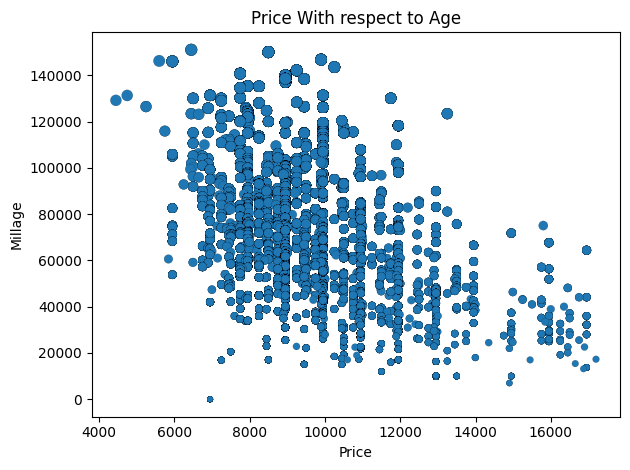

In [16]:
sns.scatterplot(data=new_df,x='Price',y='KM',edgecolor='k',size='KM',linewidth=0.09,legend=False)
plt.title('Price With respect to Age')
plt.xlabel('Price')
plt.ylabel('Millage')
plt.tight_layout()
plt.show()

From the scatter-plot we can say that, Price of a car decreases with high millage(KM).

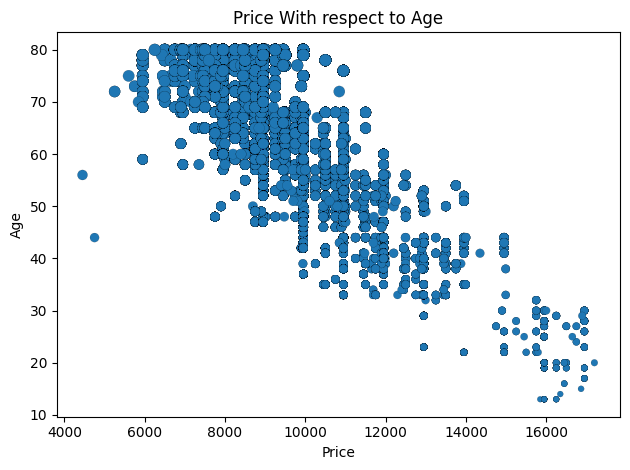

In [17]:
sns.scatterplot(data=new_df,x='Price',y='Age',edgecolor='k',linewidth=0.09,size='Age',legend=False)
plt.title('Price With respect to Age')
plt.xlabel('Price')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

From the scatter-plot we can say that ,Price of a car decreases with its age.

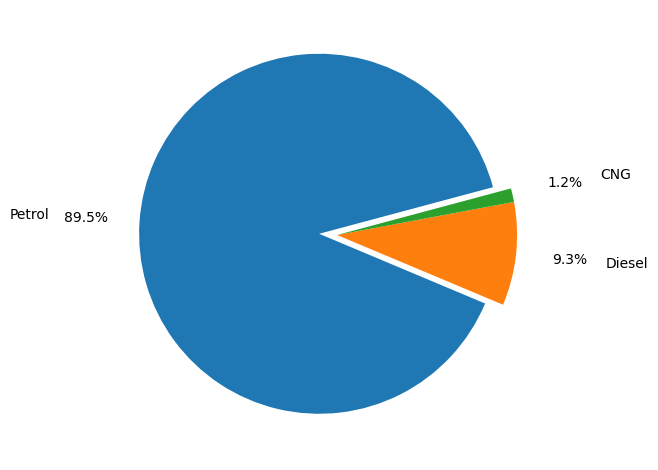

In [18]:
plt.pie(new_df['Fuel_Type'].value_counts(),labels=['Petrol','Diesel','CNG'],autopct='%1.1f%%',pctdistance=1.3,startangle=15,labeldistance=1.5,explode=[0.1,0,0])
plt.tight_layout()

plt.show()

From the piechart we can say that most cars sold run on petrol.

Selecting feature(X) and Target(Y)

In [19]:
X=new_df.iloc[:,1:].values
y=new_df.iloc[:,0].values

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Converting categorical column into numerical column using one-hot encoder

In [21]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[9])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
from sklearn.model_selection import train_test_split

Splitting Feature into Training and Test set (80/20)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=20)

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

Training first model with all features

In [25]:
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(x_test)

In [27]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,8950.0,8891.557045
1,8250.0,8691.995631
2,8950.0,9346.726694
3,8950.0,9118.821757
4,9900.0,9448.223609
...,...,...
7476,7750.0,7565.581446
7477,9950.0,11062.290075
7478,9250.0,9295.743566
7479,10950.0,10345.253725


In [28]:
from sklearn.metrics import r2_score,mean_squared_error

R square and Mean Square error

In [29]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'R square: {r2}')

MSE: 786639.856762933
R square: 0.6828010666653429


Model 1:

MSE: 786639.856762933

R square: 0.6828010666653429

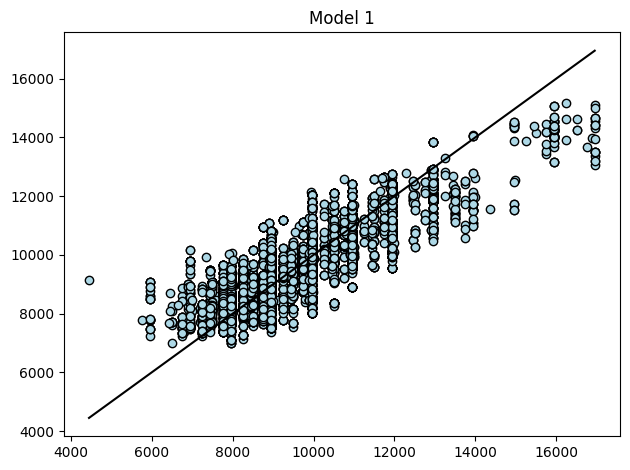

In [30]:
plt.scatter(y_test,y_pred,edgecolor='black',color='lightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='k')
plt.title('Model 1')
plt.tight_layout()
plt.show()

Selecting some features for second model

In [31]:
new_X = df.iloc[:, [1,2,4,6]].values
new_y = df.iloc[:,0].values

Training and test set for second model

In [32]:
x1_train,x1_test,y1_train,y1_test = train_test_split(new_X,new_y,train_size=0.8,random_state=20)

In [33]:
model = LinearRegression()

Training Second model with selected features

In [34]:
model.fit(x1_train,y1_train)

LinearRegression()

In [35]:
y_pred1 = model.predict(x1_test)

In [36]:
pd.DataFrame({'Actual':y1_test,'Predicted':y_pred1}).head(25)

,Actual,Predicted
0,17950,15482.362453
1,7950,7929.121817
2,8250,6547.401002
3,18950,12318.835544
4,11950,13240.966793
5,10500,11721.787483
6,16950,15003.213194
7,8500,7516.419478
8,11650,13447.411927
9,9950,9686.112318


R square and Mean Square Error

In [37]:
mse1 = mean_squared_error(y1_test,y_pred1)
r2_1 = r2_score(y1_test,y_pred1)
print(f'MSE: {mse1}')
print(f'R square: {r2_1}')

MSE: 2543225.96576848
R square: 0.8078842629235939


Model 2:

MSE: 2543225.96576848

R square: 0.8078842629235939

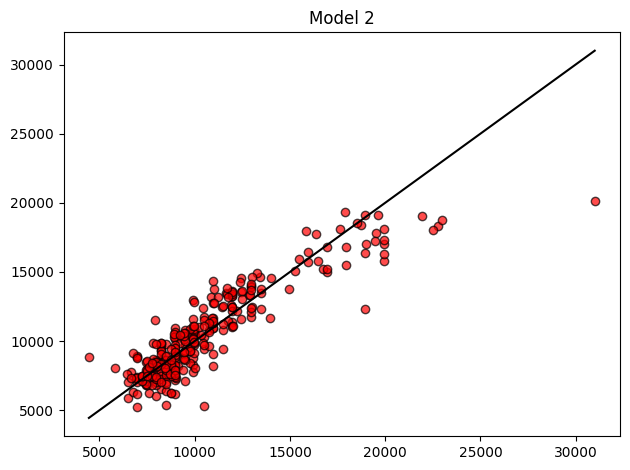

In [38]:
plt.scatter(y1_test,y_pred1,edgecolor='black',color='red',alpha=0.7)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()],color='k')
plt.title('Model 2')
plt.tight_layout()
plt.show()

Selecting features for final model

In [39]:
X_fin = new_df.iloc[:,[1,2,3,5,9,10]].values
Y_fin = new_df.iloc[:,0].values

In [40]:
ct1 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5])],remainder='passthrough')
X_fin = np.array(ct1.fit_transform(X_fin),dtype=int)

In [41]:
#X_fin

Training and Test set for Third Model

In [42]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X_fin,Y_fin,test_size=0.2,random_state=20)

In [43]:
model_2 = LinearRegression()

Training model with some features

In [44]:
model_2.fit(x2_train,y2_train)

LinearRegression()

In [45]:
y_pred2 = model_2.predict(x2_test)

In [46]:
pd.DataFrame({'Actual':y2_test,'Predicted':y_pred2}).head(25)

,Actual,Predicted
0,8950.0,8913.083302
1,8250.0,8712.430185
2,8950.0,9362.408205
3,8950.0,9096.351781
4,9900.0,9424.399344
5,8950.0,9335.571580
6,9950.0,10424.677938
7,9950.0,9884.181540
8,11500.0,10843.667257
9,8500.0,9595.066868


In [47]:
mse2 = mean_squared_error(y2_test,y_pred2)
r2_2 = r2_score(y2_test,y_pred2)
print(f'MSE: {mse2}')
print(f'R square: {r2_2}')

MSE: 788505.8366102622
R square: 0.6820486425260011


Model 3:

MSE: 788505.8366102622

R square: 0.6820486425260011

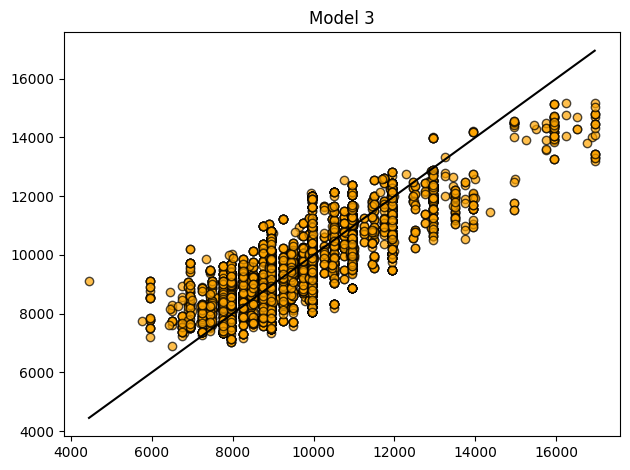

In [48]:
plt.scatter(y2_test, y_pred2, color='orange' ,alpha=0.7,edgecolors='k')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='k')
plt.title('Model 3')
plt.tight_layout()
plt.show()

Lasso and Ridge

In [49]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

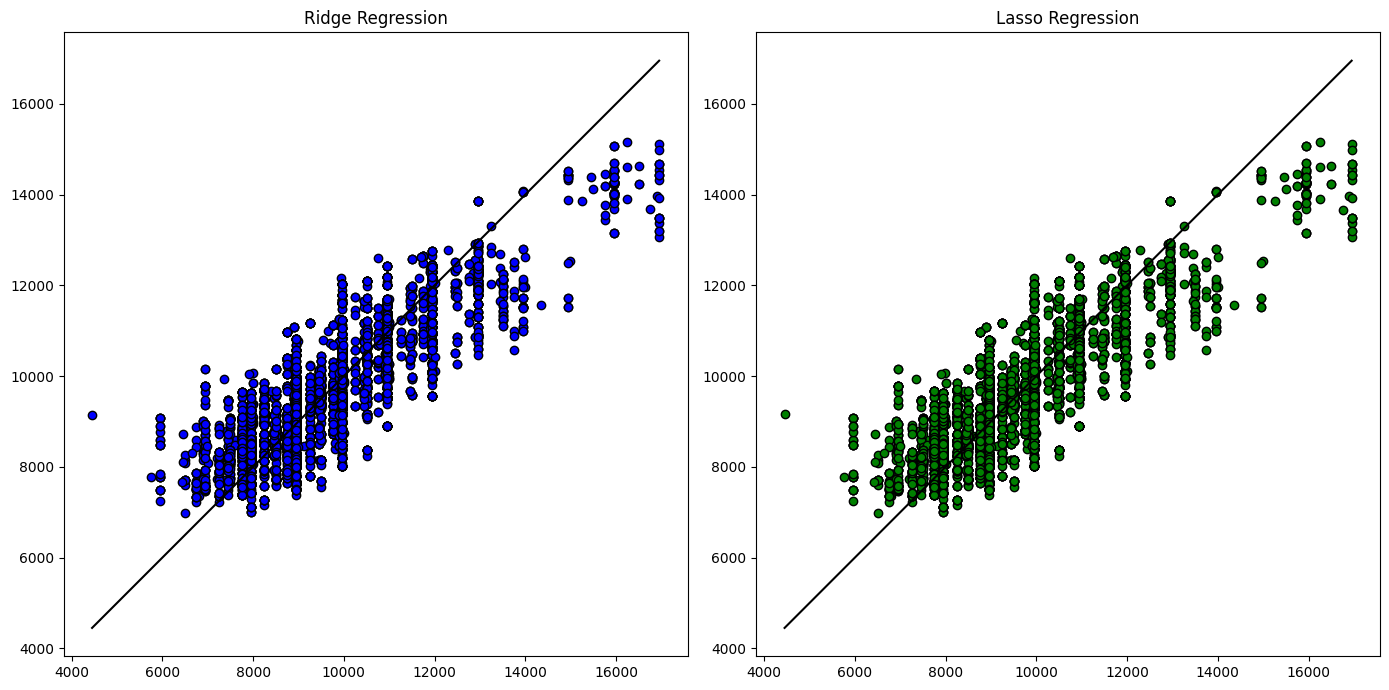

In [53]:
fig,[ax1,ax2] = plt.subplots(nrows=1,ncols=2)

fig.set_size_inches(14,7)

ax1.scatter(y_test, y_pred_ridge, color='blue',edgecolors='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k')
ax1.set_title('Ridge Regression')



ax2.scatter(y_test, y_pred_lasso, color='green',edgecolors='k')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k')
ax2.set_title('Lasso Regression')

plt.tight_layout()
plt.show()

What is Normalization & Standardization and how is it helpful?

Noramlization and Standardiztion are techniques used in ML to scale down values for the model to learn effectively. Noramalization gives values between 0,1 using formula x-x(min)/x(max)-x(min) and standardization gives values between -3 and +3, mean and std is 0 and 1 respectively. formula for standardization is x-mean/std

What techniques can be used to address multicollinearity in multiple linear regression?

Techniques for addressing multicollinearity are:

1) Using Correlation matrix.
2) Lasso and Ridge methods.